In [49]:
from blackjack_env import BlackjackEnv
from poker_cards import CARD_DECK, CARD_VALUES
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## Initialize 
n_decks = 1
env = BlackjackEnv()
Q = np.zeros((32, 2, 12, env.action_space.n))
gamma = 1
alpha = 0.1
epsilon = 1
epsilon_decay = 0.99
min_epsilon = 0.05

In [3]:
## Functions
def update_q_table(state, action, reward, next_state): # state is a dict
    # extract and unpack obs
    a, b, c = list(state.values())
    na, nb, nc = list(next_state.values())

    # update table
    old_value = Q[a, b, c, action]
    next_max = max(Q[na, nb, nc])
    Q[a, b, c, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

def epsilon_greedy(state):
    # implement the condition to explore
    if np.random.rand() < epsilon:
      	# choose a random action
        action = env.action_space.sample()
    else:
      	# choose the best action according to Q
        a, b, c = list(state.values())
        action = np.argmax(Q[a, b, c])
    return action

In [ ]:
## Training loop
n_episodes = 1000000
episode_returns = []

for episode in range(n_episodes):
    state, info = env.reset()
    episode_reward = 0
    terminated = False

    while not terminated:
        action = epsilon_greedy(state)
        new_state, reward, terminated, truncated, info = env.step(action)
        update_q_table(state, action, reward, new_state)
        state = new_state

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    episode_returns.append(reward)

In [63]:
import numpy as np
import sys

def print_policy(Q):
    sys.stdout.write("\033[H\033[J")  # clear screen

    for usable_ace in [0, 1]:
        print(f"\nUsable Ace = {usable_ace}")
        print("Player↓ | Dealer→")
        print("           2 3 4 5 6 7 8 9 10 A")
        print("-" * 40)
        for player_value in range(4, 22):  # common range
            row = f"{player_value:>3}      | "
            for dealer_up in range(10):  # index 0..9
                action = np.argmax(Q[player_value, usable_ace, dealer_up])
                symbol = "H" if action == 1 else "S"
                row += symbol + " "
            print(row)

print_policy(Q)


Usable Ace = 0
Player↓ | Dealer→
           2 3 4 5 6 7 8 9 10 A
----------------------------------------
  4      | S S H H H H H H H H 
  5      | S S H H H H H H H H 
  6      | S S H H H H H H H S 
  7      | S S H H S H H H H H 
  8      | S S S H H H H S S H 
  9      | S S S S H H H H H H 
 10      | S S S S S H S H H H 
 11      | S S S H H S H S S H 
 12      | S S S H H H S S H H 
 13      | S S S S S S H H S S 
 14      | S S H H S S S S H H 
 15      | S S S S S S S H S S 
 16      | S S S S H S S S S S 
 17      | S S S S S S S S S H 
 18      | S S S S S S S S S S 
 19      | S S S S S S S S S S 
 20      | S S S S S S S S S S 
 21      | S S S S S S S S S S 

Usable Ace = 1
Player↓ | Dealer→
           2 3 4 5 6 7 8 9 10 A
----------------------------------------
  4      | S S S S S S S S S S 
  5      | S S S S S S S S S S 
  6      | S S S S S S S S S S 
  7      | S S S S S S S S S S 
  8      | S S S S S S S S S S 
  9      | S S S S S S S S S S 
 10      | S S S S

In [ ]:
## Strategy Visualization
def print_specific_strat(Q, usable_ace, dealer_up_card):
    strat = []
    for i in range(1, 22):
        stand_q = Q[i, usable_ace, dealer_up_card][0]
        hit_q = Q[i, usable_ace, dealer_up_card][1]
        if stand_q > hit_q:
            strat.append('S')
        else:
            strat.append('H')
    print(strat)

def print_table(Q):
    print("Hand Value: '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'")
    for i in range(2, 12):
        print()
    
print_strat(Q, 0, 10)

['H', 'H', 'H', 'H', 'S', 'H', 'S', 'H', 'S', 'H', 'S', 'S', 'S', 'H', 'H', 'S', 'H', 'S', 'S', 'S', 'S', 'S']


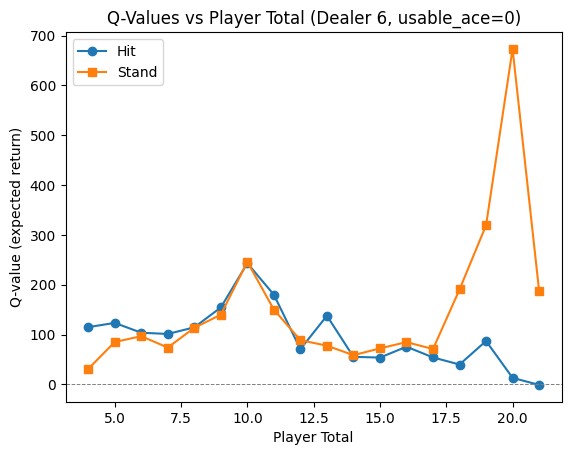

In [48]:
def plot_q_values(Q, dealer_idx=6, usable_ace=0):
    totals = range(4, 22)  # valid hand totals
    q_hit = [Q[t, usable_ace, dealer_idx, 1] for t in totals]
    q_stand = [Q[t, usable_ace, dealer_idx, 0] for t in totals]

    plt.plot(totals, q_hit, label="Hit", marker="o")
    plt.plot(totals, q_stand, label="Stand", marker="s")
    plt.axhline(0, color="gray", linestyle="--", linewidth=0.7)
    plt.xlabel("Player Total")
    plt.ylabel("Q-value (expected return)")
    plt.title(f"Q-Values vs Player Total (Dealer {dealer_idx}, usable_ace={usable_ace})")
    plt.legend()
    plt.show()

plot_q_values(Q)